In [14]:
import qmcpy as qp
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import cProfile
import pstats

In [15]:
def natural(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural" ,is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def natural_process(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="natural_process")
    points = l.gen_samples(num_ports) 
    return points
def mps(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps" ,is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def mps_process(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="mps_process",is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def linear(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear" ,is_parallel=True)
    points = l.gen_samples(num_ports) 
    return points
def linear_process(n, num_ports, seed=None):
    l = qp.Lattice(dimension=n, seed=seed,order="linear_process")
    points = l.gen_samples(num_ports) 
    return points

In [37]:
trials = 1
d_list = [x for x in range(100, 2_000, 100)]
n = 10
data = {'index':d_list}
frame = pd.DataFrame(data)
frame = frame.set_index('index')
names = set()

#list contiants the function and a string of its name
run_list = [(natural, "natural"),(natural_process,"natural process"),(linear, "linear"),(linear_process,"linear process"),(mps,"mps"),(mps_process,"mps process")]

for method,method_name in run_list:

    name = method_name.split(" ")

    names.add(name[0])

    times = []
    
    for d in d_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, 2 ** n)
        profiler.disable()
        
        stats = pstats.Stats(profiler)
            
        process_time = stats.total_tt

        print(f'Process time {process_time} method name {method_name}')
        times.append(process_time)
        
    frame[method_name] = times        


names = list(names)     
print(frame)   


Process time 0.0104526 method name natural
Process time 0.0160764 method name natural
Process time 0.021860700000000007 method name natural
Process time 0.03513560000000003 method name natural
Process time 0.032342699999999995 method name natural
Process time 0.0332404 method name natural
Process time 0.0386581 method name natural
Process time 0.0409031 method name natural
Process time 0.05095100000000002 method name natural
Process time 0.05196279999999998 method name natural
Process time 0.054835900000000014 method name natural
Process time 0.06091189999999998 method name natural
Process time 0.06460110000000001 method name natural
Process time 0.07031890000000002 method name natural
Process time 0.07458110000000004 method name natural
Process time 0.08096929999999998 method name natural
Process time 0.09223079999999997 method name natural
Process time 0.09144039999999998 method name natural
Process time 0.0970567 method name natural
Process time 1.4107958000000005 method name natura

In [52]:
compare_methods= [('natural', 'natural process'),('mps', 'mps process'),('linear', 'linear process')]


def speed_up_cal(data_frame, compare_list, dimension_list):
    result = []
    for seq,pro in compare_list:
        result = []
        for x in dimension_list:
            a = data_frame[seq][x]
            b = data_frame[pro][x]
            result.append(a/b)
        data_frame[seq + " speed-up"] = result


speed_up_cal(frame, compare_methods, d_list)

print(frame)





        natural  natural process    linear  linear process       mps  \
index                                                                  
100    0.010453         1.410796  0.008108        0.006433  0.015389   
200    0.016076         1.711196  0.013472        0.012719  0.016504   
300    0.021861         1.664644  0.019719        0.018433  0.021287   
400    0.035136         1.564381  0.026893        0.024394  0.025855   
500    0.032343         1.618217  0.030438        0.030380  0.029398   
600    0.033240         1.553705  0.036513        0.036223  0.042706   
700    0.038658         1.589017  0.041888        0.042799  0.047308   
800    0.040903         1.566933  0.048281        0.048561  0.049638   
900    0.050951         1.605232  0.058647        0.053719  0.053156   
1000   0.051963         1.700344  0.060178        0.058460  0.060045   
1100   0.054836         1.647188  0.066543        0.063995  0.063383   
1200   0.060912         1.552335  0.072710        0.070557  0.06

[0.00693277 0.00984879 0.01208719 0.01530967 0.01847143 0.0254678
 0.02598441 0.02658238 0.02982077 0.03322009 0.03506006 0.03778824
 0.04210239 0.044317   0.0484628  0.05096258 0.05354701 0.05814812
 0.05895443]


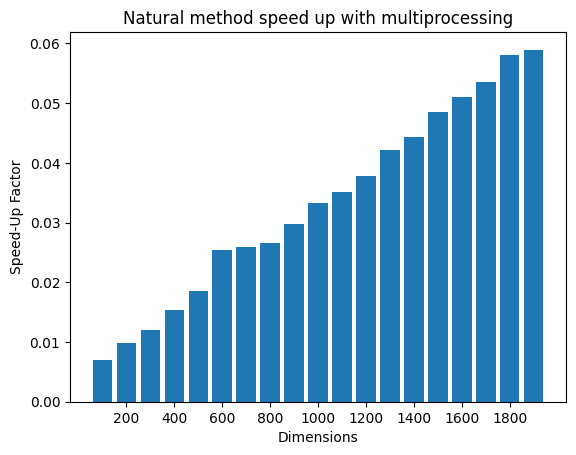

[1.05582903 1.00253821 1.0296553  1.01900975 1.02571166 0.97133994
 0.95349103 0.99873211 0.9821441  0.99132914 0.96634173 1.02045544
 0.99206221 1.0385796  1.05230744 0.99279699 1.01917658 1.00370265
 1.03009898]


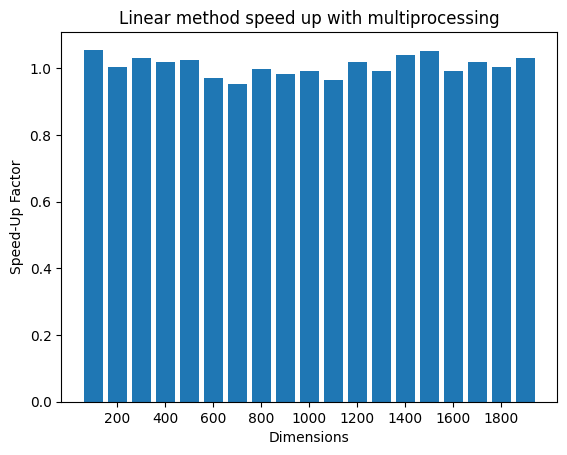

[0.01060413 0.01404481 0.01488456 0.01813135 0.02308796 0.02994402
 0.03204654 0.03645505 0.03836643 0.04163591 0.04448669 0.04778015
 0.04852176 0.05206928 0.05490613 0.05694837 0.0625492  0.06311619
 0.06449175]


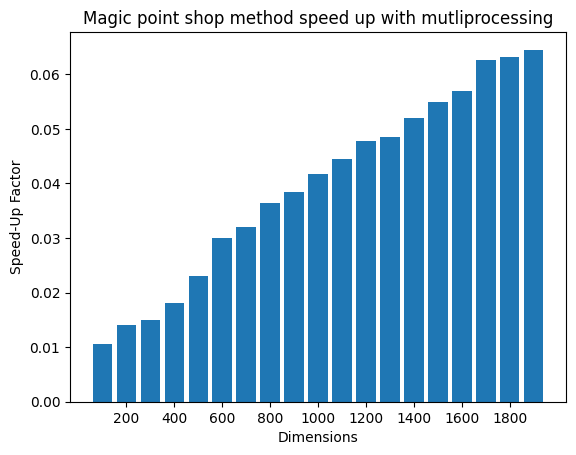

In [32]:

x = lambda array: [str(x) for x in array]

y_axis = frame["natural speed-up"].to_numpy()
print(y_axis)
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Natural method speed up with multiprocessing')
plt.xticks(np.arange(1,len(d_list),2))
plt.show()


y_axis = frame["linear speed-up"].to_numpy()
print(y_axis)
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method speed up with multiprocessing')
plt.xticks(np.arange(1,len(d_list),2))
plt.show()

y_axis = frame["mps speed-up"].to_numpy()
print(y_axis)
x_axis = x(d_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Dimensions')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point shop method speed up with mutltiprocessing')
plt.xticks(np.arange(1,len(d_list),2))
plt.show()

In [56]:
p_list = [2 ** x for x in range(2, 15, 2)]
dimension = 1000
trials = 1
records = {'index':p_list}
frame2 = pd.DataFrame(records)
frame2 = frame2.set_index('index')
names = set()

for method, method_name in run_list:
    name = method_name.split(" ")

    names.add(name[0])


    times = []
    
    for p in p_list:
        profiler = cProfile.Profile()
        profiler.enable()
        for _ in range(trials):
            method(d, p)
        profiler.disable()
    
        stats = pstats.Stats(profiler)
        
        process_time = stats.total_tt

        # print(f'Process time {process_time} method name {method_name}')
        times.append(process_time)
    
    frame2[method_name] = times        


names = list(names)  
speed_up_cal(frame2,compare_methods, p_list)   

In [57]:
speed_up_cal(frame2,compare_methods, p_list)

[0.12831098 0.00825152 0.02350787 0.02179305 0.06415538 0.17730619
 0.4238538 ]


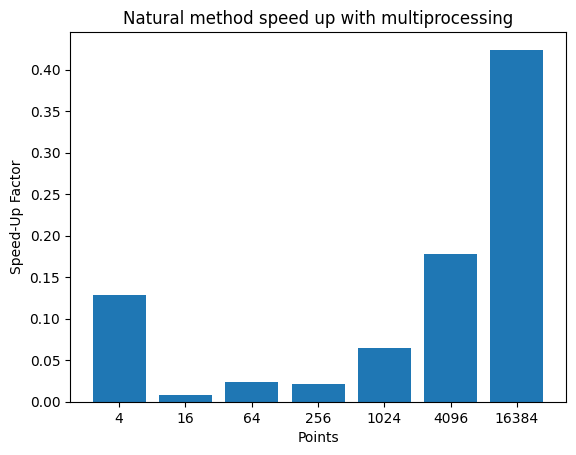

[0.96085804 0.23053735 0.90493514 1.00164921 0.97425698 1.00024044
 1.00636558]


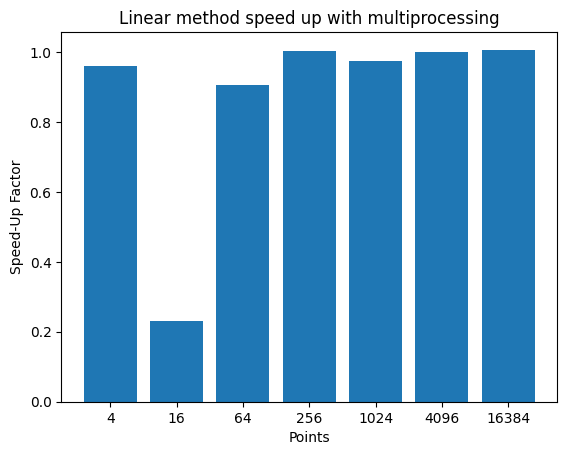

[0.00738883 0.00377223 0.00991078 0.02864911 0.06291312 0.17941407
 0.42337259]


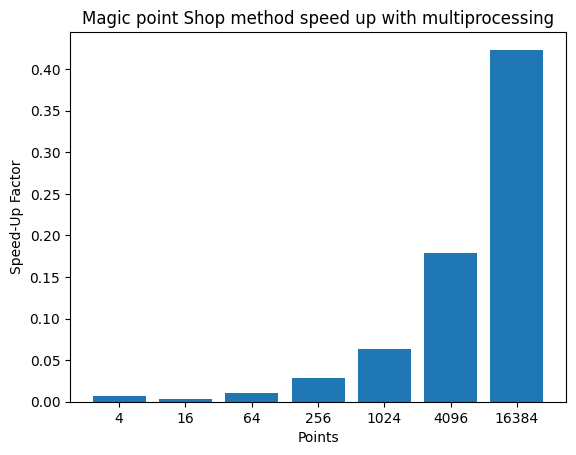

In [58]:
x = lambda array: [str(x) for x in array]

y_axis = frame2["natural speed-up"].to_numpy()
print(y_axis)
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('NONE')
plt.title('Natural method speed up with multiprocessing')
plt.show()

y_axis = frame2["linear speed-up"].to_numpy()
print(y_axis)
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Linear method speed up with multiprocessing')
plt.show()

y_axis = frame2["mps speed-up"].to_numpy()
print(y_axis)
x_axis = x(p_list)
plt.bar(x_axis, y_axis)
plt.xlabel('Points')
plt.ylabel('Speed-Up Factor')
plt.title('Magic point Shop method speed up with multiprocessing')
plt.show()